# 13 -- Fashion MNIST - TensorFlow

## Victor Jose Novaes Pires

### 2019-03-16

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [4]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [5]:
from pandas import __version__

print(f"Pandas version: {__version__}")

Pandas version: 0.24.2


In [6]:
from scipy import __version__

print(f"SciPy version: {__version__}")

SciPy version: 1.2.1


In [7]:
from seaborn import __version__

print(f"Seaborn version: {__version__}")

Seaborn version: 0.9.0


In [8]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.3


In [9]:
from tensorflow import __version__

print(f"TensorFlow version: {__version__}")

TensorFlow version: 1.12.0


In [10]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0.1


## Fashion MNIST dataset

In [11]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
import numpy as np

classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
num_classes = len(classes)

num_classes

10

In [14]:
names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

names = {k: v for k, v in zip(classes, names)}

names

{0: 'T-shirt/Top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Flattening

In [15]:
X_train = np.asarray([X.flatten() for X in X_train])

X_train.shape

(60000, 784)

In [16]:
X_test = np.asarray([X.flatten() for X in X_test])

X_test.shape

(10000, 784)

In [17]:
y_train = y_train.reshape(-1, 1)

y_train.shape

(60000, 1)

In [18]:
y_test = y_test.reshape(-1, 1)

y_test.shape

(10000, 1)

### Categorization

In [19]:
from keras.utils import to_categorical

y_train_c = to_categorical(y_train, num_classes)
y_test_c = to_categorical(y_test, num_classes)

y_train_c.shape, y_test_c.shape

((60000, 10), (10000, 10))

### Feature scaling

In [20]:
X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [21]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [22]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

### Equations on: 01 -- Digits MNIST - NumPy

### Dataset analysis on: 11 -- Fashion MNIST - NumPy

## TensorFlow graph

In [23]:
import tensorflow as tf

input_size = X_train.shape[1]

X = tf.placeholder(tf.float32, shape=[None, input_size])

hidden_layer_size = 128

# Input weights
Θ1 = tf.Variable(tf.random.uniform([input_size, hidden_layer_size], seed=42),
                 dtype=tf.float32)

# Input bias
b1 = tf.Variable(tf.zeros(hidden_layer_size), dtype=tf.float32)

# Input activity
z1 = tf.matmul(X, Θ1) + b1

# Input activation
a1 = tf.nn.relu(z1)

# Output weights
Θ2 = tf.Variable(tf.random.uniform([hidden_layer_size, num_classes], seed=42),
                 dtype=tf.float32)

# Output bias
b2 = tf.Variable(tf.zeros(num_classes), dtype=tf.float32)

# Output activity
z2 = tf.matmul(a1, Θ2) + b2

y = tf.placeholder(tf.float32, shape=[None, num_classes])

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=z2))

optimizer = tf.train.AdamOptimizer(learning_rate=0.1)

training = optimizer.minimize(loss)

predictions = tf.argmax(z2, axis=1)

accuracy = tf.equal(predictions, tf.argmax(y, 1))

accuracy_score = tf.reduce_mean(tf.cast(accuracy, tf.float32))

init = tf.global_variables_initializer()

In [24]:
np.random.seed(42)

def make_batch(X, y, batch_size):
    indices = np.random.choice(len(X), batch_size, replace=False)
    return X[indices], y[indices]

epochs = 5

iterations = 5_001

batch_size = 2**10

In [25]:
%%time

with tf.Session() as session:
    session.run(init)
    for epoch in range(epochs):
        print(f">>> Epoch: {epoch + 1}")
        for iteration in range(iterations):
            X_batch, y_batch = make_batch(X_train, y_train_c, batch_size)

            session.run(training, feed_dict={X: X_batch, y: y_batch})

            if (iteration%1_000 == 0):
                loss_val = loss.eval(feed_dict={X: X_train, y: y_train_c})
                print(f"Iteration: {iteration:5,d}\tLoss: {loss_val:.5f}")

        train_loss = loss.eval(feed_dict={X: X_train, y: y_train_c})
        train_acc = accuracy_score.eval(feed_dict={X: X_train,y: y_train_c})
        print(f"\nTrain loss: {train_loss:.5f}\tTrain accuracy: {100*train_acc:.2f}%")
        test_loss = loss.eval(feed_dict={X: X_test, y: y_test_c})
        test_acc = accuracy_score.eval(feed_dict={X: X_test, y: y_test_c})
        print(f"Test loss:  {test_loss:.5f}\tTest accuracy:  {100*test_acc:.2f}%")
        print('-'*50)

    p_train = predictions.eval(feed_dict={X: X_train}).reshape(-1, 1)
    p_test = predictions.eval(feed_dict={X: X_test}).reshape(-1, 1)

print()

>>> Epoch: 1
Iteration:     0	Loss: 584.13574
Iteration: 1,000	Loss: 0.71453
Iteration: 2,000	Loss: 0.55075
Iteration: 3,000	Loss: 0.48117
Iteration: 4,000	Loss: 0.46692
Iteration: 5,000	Loss: 0.49603

Train loss: 0.49603	Train accuracy: 83.36%
Test loss:  0.59356	Test accuracy:  80.76%
--------------------------------------------------
>>> Epoch: 2
Iteration:     0	Loss: 0.49117
Iteration: 1,000	Loss: 0.47906
Iteration: 2,000	Loss: 0.51003
Iteration: 3,000	Loss: 0.49526
Iteration: 4,000	Loss: 0.50119
Iteration: 5,000	Loss: 0.45991

Train loss: 0.45991	Train accuracy: 83.87%
Test loss:  0.58296	Test accuracy:  81.49%
--------------------------------------------------
>>> Epoch: 3
Iteration:     0	Loss: 0.46226
Iteration: 1,000	Loss: 0.49503
Iteration: 2,000	Loss: 0.47559
Iteration: 3,000	Loss: 0.46108
Iteration: 4,000	Loss: 0.53220
Iteration: 5,000	Loss: 0.54162

Train loss: 0.54162	Train accuracy: 81.60%
Test loss:  0.67434	Test accuracy:  78.89%
--------------------------------------

## Scores

### Training set

In [26]:
import NNfromScratch as nnfs

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 82.95%


In [27]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 49,767 out of 60,000 images.


In [28]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 10,233 out of 60,000 images.


### Test set

In [29]:
a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 80.24%


In [30]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 8,024 out of 10,000 images.


In [31]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 1,976 out of 10,000 images.


## Distribution of labels

In [32]:
import pandas as pd

df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])
df['Pred Train'] = np.bincount(p_train.reshape(-1))
df['Train Diff'] = df['Pred Train'] - df['Y Train']
df['Y Test'] = np.bincount(y_test.reshape(-1))
df['Pred Test'] = np.bincount(p_test.reshape(-1))
df['Test Diff'] = df['Pred Test'] - df['Y Test']
df['Y Combined'] = df['Y Train'] + df['Y Test']
df['Pred Combined'] = df['Pred Train'] + df['Pred Test']
df['Combined Diff'] = df['Pred Combined'] - df['Y Combined']
df.index.set_names('Labels', inplace=True)
df

,Y Train,Pred Train,Train Diff,Y Test,Pred Test,Test Diff,Y Combined,Pred Combined,Combined Diff
Labels,,,,,,,,,
0,6000,6745,745,1000,1078,78,7000,7823,823
1,6000,5635,-365,1000,941,-59,7000,6576,-424
2,6000,4053,-1947,1000,675,-325,7000,4728,-2272
3,6000,5306,-694,1000,896,-104,7000,6202,-798
4,6000,7672,1672,1000,1283,283,7000,8955,1955
5,6000,6278,278,1000,1026,26,7000,7304,304
6,6000,6366,366,1000,1078,78,7000,7444,444
7,6000,6376,376,1000,1088,88,7000,7464,464
8,6000,6239,239,1000,1047,47,7000,7286,286


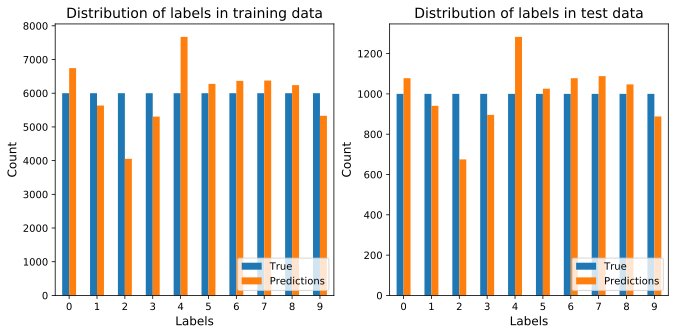

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

df[['Y Train', 'Pred Train']].plot.bar(ax=axes[0], rot=0)
axes[0].set_title("Distribution of labels in training data", fontsize=14)
axes[0].set_xlabel("Labels", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(['True', 'Predictions'], loc='lower right')

df[['Y Test', 'Pred Test']].plot.bar(ax=axes[1], rot=0)
axes[1].set_title("Distribution of labels in test data", fontsize=14)
axes[1].set_xlabel("Labels", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(['True', 'Predictions'], loc='lower right')

plt.show()

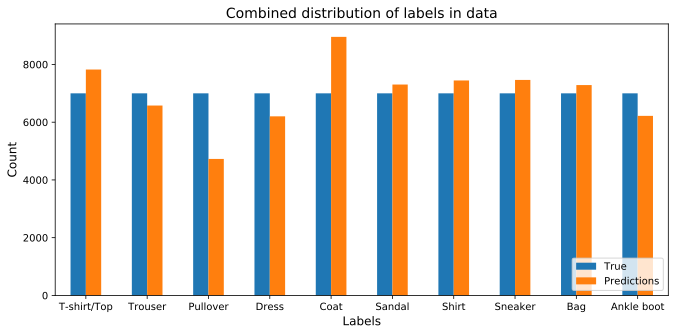

In [34]:
df[['Y Combined', 'Pred Combined']].plot.bar(figsize=(11, 5), rot=0)
plt.title("Combined distribution of labels in data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(np.arange(10), names.values())
plt.legend(['True', 'Predictions'], loc='lower right')
plt.show()

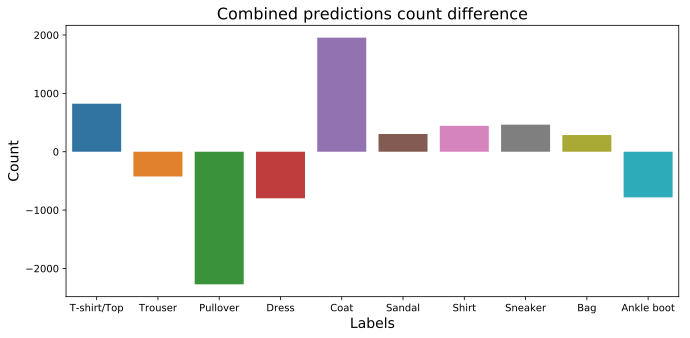

In [35]:
import seaborn as sns

plt.figure(figsize=[11, 5])
sns.barplot(data=df[['Combined Diff']].T)
plt.title("Combined predictions count difference", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(np.arange(10), names.values())
plt.show()

## Correctly classified images

In [36]:
import matplotlib.pyplot as plt

def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {names[y[indices[i]][0]]} | Pred: {names[p[indices[i]][0]]}", fontsize=10)
        ax.set_axis_off()

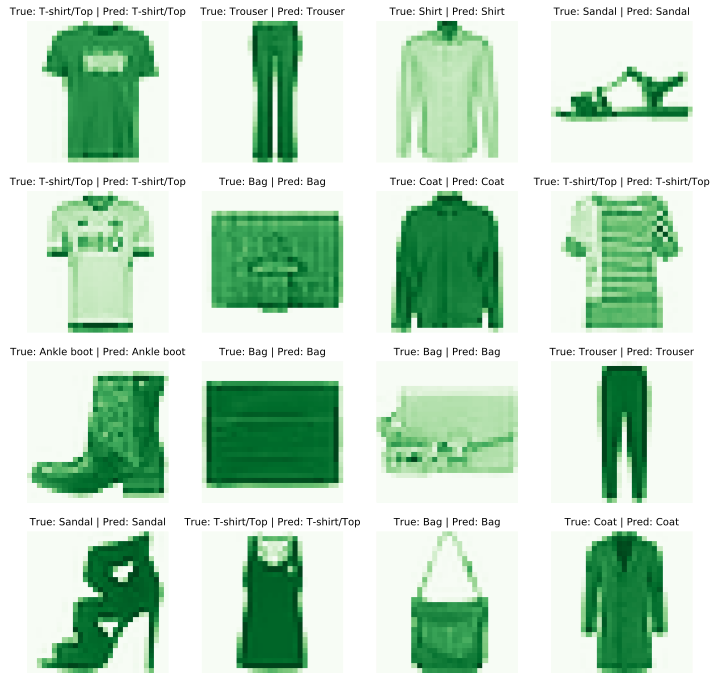

In [37]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

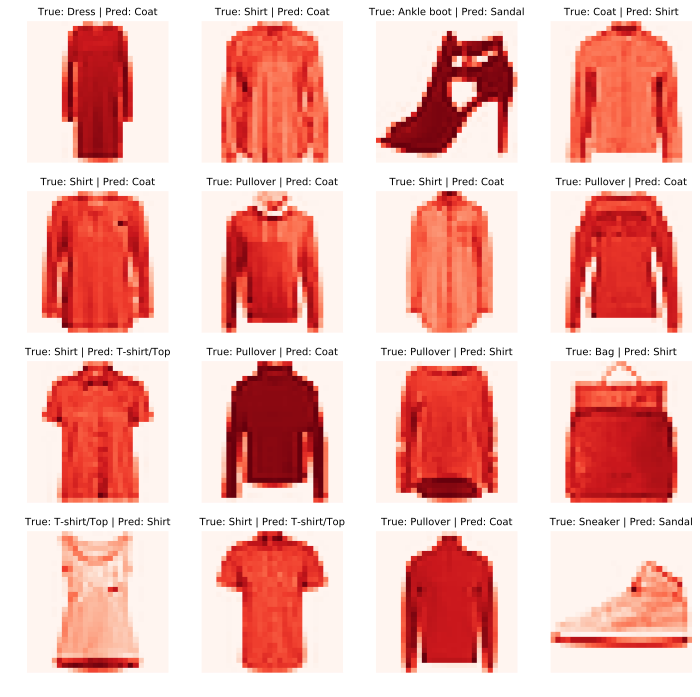

In [38]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')